
Imagine that you are part of a team writing a new game. The game involves a dungeon inhabited by a
monster called the Wumpus1
. The dungeon contains both gold bars, and pits full of spikes as well as the
Wumpus. Your job is to write code to control a character, who we will call “Link”. Link’s objective is to navigate through the dungeon, collecting all the gold bars, and avoiding both the pits and the Wumpus: if
Link encounters either a pit or the Wumpus, they will immediately die and the game ends.
You will be provided with Python code that implements the dungeon (including Wumpus, pits and gold)
and which provides an API that allows Link to move, and provides information on the location of pits,
gold and Wumpus as well as Link themself. Note that Link’s movement is non-deterministic, so that Link
does not always manage to move in the direction that they wish to.

**a)** Provide control code for Link that allows them to successfully navigate the dungeon when the
dungeon is static, meaning that the Wumpus does not move. 

**b)** Provide control code for Link that allows them to successfully navigate the dungeon when the
dungeon is dynamic, meaning that the Wumpus moves. 

The solution to a) and b) may be the same piece of code, or two separate pieces of code, the
choice is yours.

**c)** Evaluate the performance of your code for a range of values of the size of the dungeon and the
numbers of Wumpus, pits and gold. 

## STARTER
The work here was done using a conda environment. To start, for ease of use, please create a conda environment with:
<br>
<br>
*conda create -n p38 python=3.8*
<br>
<br>
where **p38** can be any chosen name for the environment. You may specify whichever Python version you like. However again, for ease of use, I recomend Python 3.8 as this was the one I used and I know works well. Pip install missing components if you get “ImportError: No module named...” 

### Solution: a), b)


A decision to use **Q-Learning** to solve the problem in a static and dynamic world was made (a very unconventional version of it though). The solution was engineered to tend to both **a)** and **b)** as one piece of code withing the **Link** class.

<br>

### What is Q-Learning and how does it work
It is a type of reinforcement learning algorithm that involves an AI agent (Link) operating in an environment with states (rooms), rewards (inputs) and actions (moves). The agent constructs an optimal policy (list of decisions on where to move) by interacting with the environment. Link does this initially by moving around the world and collecting rewards from various rooms (each room has one). Link does this a number of times, each time trying to achieve a higher reward and thus creating a better policy. **Q-Learning** operates on the basis of a Markov decision process (MDP) (taught in the module by Prof. Parsons), meaning that we cant begin to understand **Q-Learning** without covering MDPs and that they share some core mathematical notations. 

#### Markov Decision Processes (MDPs)
In an MDP, there are a set of states $S$, rewards $R$ and actions $A$. In the given environment, each of these sets has a finite number of elements (meaning theres a fixed number of all of them for Link to explore). Link moves in a time step denoted as $t = 0,1,2,3...$, achieving a new state in each step $S_t \in \boldsymbol{S}$. Based on the state $S_t$, Link selects an action $A_t \in \boldsymbol{A}$, which gives a state-action pair $(S_t,A_t)$. Each state also holds a numerical reward $R_{t+1} \in \boldsymbol{R}$. The explained process can be simply denoted as $f(S_{t}, A_{t}) = R_{t+1}\text{.}$.

(explained in more detail - https://deeplizard.com/learn/video/my207WNoeyA)

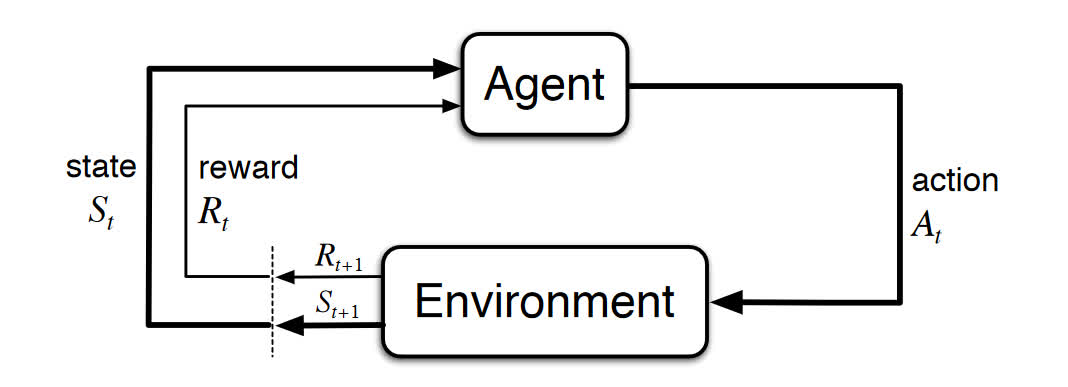

In [1]:
from IPython.display import Image
Image(filename='./assets/MDP.jpg') 

#### Q-Learning

The ‘q’ in q-learning stands for quality. Quality in this case represents how useful a given action is in gaining some future reward. Q-Learning has a q-table/matrix with the shape (state, action), where all values are initailly zero. Q-values are updated each episode, which with every iteration turns the q-table into a better reference book for Link to select the best action based on the q-value. The q-table therefore represents the agent's policy.

##### But how do the Q-values change?
Temporal difference!

Using temporal difference we can calculate the q-value's actual value change, given an action performed in the previous state. If the new state is promising, then the q vlaue for he previous action will be increased. The equation to calculate temporal difference is given:
$$TD(s_{t},a_{t}) = r_{t} + \gamma \cdot \max_{a}Q(s_{t+1},a) - Q(s_{t},a_{t})$$
where $TD(s_{t},a_{t})$ is the temporal difference for the action taken in the previous state, $r_{t}$ is the reward received for the action taken in the previous state, $\gamma$ is the discount factor, $\max_{a}Q(s_{t+1},a)$ is the largest q-value available for any action in the current state and $Q(s_{t},a_{t})$ is the q-value for the action taken in the previous state. 

but wait, there's more

we then insert the temporal difference components into the Bellman equation whiuch is given:
$$Q^{new}(s_{t},a_{t}) = Q^{old}(s_{t},a_{t}) + \alpha \cdot TD(s_{t},a_{t})$$

where $Q^{new}(s_{t},a_{t})$ is the new q-value for the action taken in the previous state, Q^{old}(s_{t},a_{t}) is the old q-value for the action taken in the previous state, $\alpha$ is the learning rate and $TD(s_{t},a_{t})$ is the temporal difference for the action taken in the previous state.

The whole process can be defined as a list of steps:

1) Initialize q-table (using np.zeros())

2) Choose $(S_t,A_t)$ from q-table <br>
A common thing to do here would be to implement an epsilon greedy strategy, which encourages the agent to explore the environment. <br>
explained well here: https://deeplizard.com/learn/video/mo96Nqlo1L8

3) Perform $A_t$ and transition to $S_{t+1}$

4) Receive $R_{t+1}$ from previous state transition and compute $TD(s_{t},a_{t})$

5) Update q-value for $S_{t-1}$

Step 5 then jumps back to step 2 and repeats for number of set episodes in training mode, which is considered the learning process.

All of this is explained more in detail in this amazing video series on Reinforcement Learning by Dr.Daniel Soper<br>
https://www.youtube.com/watch?v=wVXXLLT6srY&ab_channel=Dr.DanielSoper <br>
https://www.youtube.com/watch?v=__t2XRxXGxI&ab_channel=Dr.DanielSoper <br>
https://www.youtube.com/watch?v=iKdlKYG78j4&t=201s&ab_channel=Dr.DanielSoper

### Game updates:
* Minimap is generated and printed to console (reward map can be as well) IN CORRECT ROTATION!
* Functionality to check whether room is occupied.
* Colored print to console.
* Keep track of gold collected.
* Links expected route functionality (still taking non-deterministic actions into account so might not be accurate) and action to be taken next (UP,DOWN,LEFT,RIGHT).
* What I call 'suicide functionality'. If Link's next goal is closed off by pits or Wumpus', he realizes there is no way out and starts performing random actions.

### Solution: a), b)

Firstly, as mentioned before, the solution uses a very unconventional form of q-learning. The training procedure is performed Link's each step, meaning before performing his next transition, link will explore the environment 1000 times from that step, kind of like Nicholas Cage in that movie 'Next' (https://www.youtube.com/watch?v=rIlka-7WLnQ&ab_channel=SupernaturalEarth 1:21). This does not need to be the case when operating in a static environment as the q-values can be generated before taking action and then referenced later on. Given that the map does not change in that level, the q-values ensure a good action map for the agent to reference. This was however done for convenience in order to solve the problem in both static and dynamic environments. Given that Link's actions are non-deterministic, his movement direction probability can be nicely fed into the epsilon greedy algorithm.

The basis of the movement code was adapted from Dr.Soper's series and integrated into the Wumpus world. Minimap and reward map are generated from scratch (see code). Reward map is changing in dynamic env and takes into account Wumpus movement probability, meaning there is a penalty if Link moves close to enemies (see code).



### Static environment 

Link moves very logically in this environment, correctly avoiding pits and Wumpus' and always chosing the most optimal path to the closest gold room (remember, there is an 80% chance he might perform a wrong move though). The solution first accounts for a minimap, which is meant to show a form of the graphics window in the console output. The reward map is then computed from the minimap, replacing positions with rewards. 

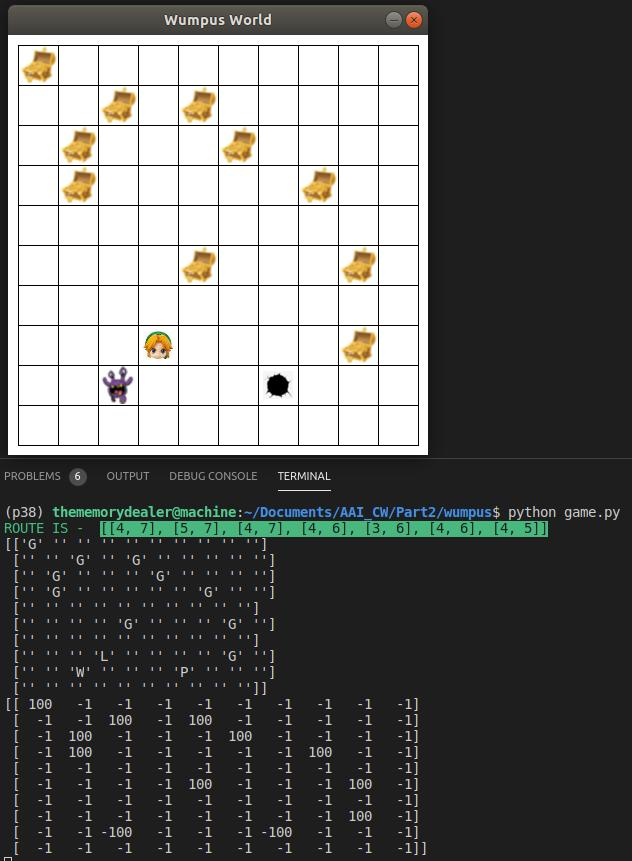

In [5]:
from IPython.display import Image
Image(filename='./assets/pic.jpg') 

where:

Gold(G) = 100<br>

Pits(P) = -100<br>

Wumpus(W) = -100<br>

Empty room('') = -1

The reason an empty room holds a reward of -1 is because the agent could move around empty rooms endlesly, thus accumaling a large reward. To encourage Link to find the most optimal path, a penalty of -1 is given for each room entry.

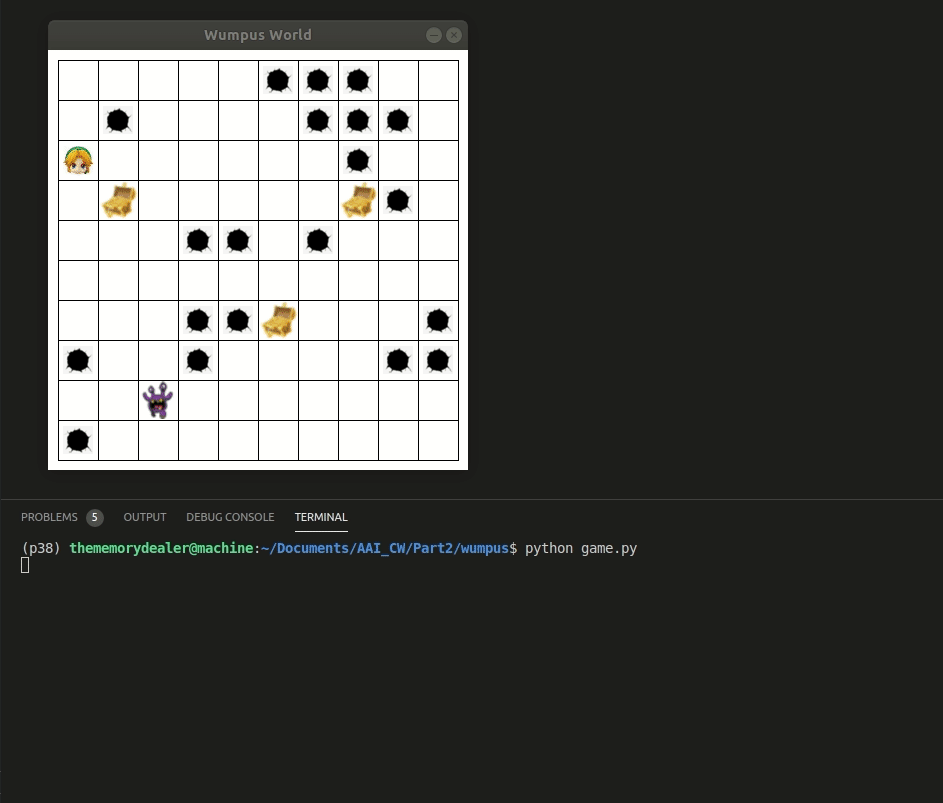

In [2]:
from IPython.display import Image
Image(filename='./assets/expl1.gif') 

Again, an important thing to note is that the computed route still takes into account the 80% movement to desired direction probability, therefore the route is not always right. The gif's might seem choppy due to being recorded at 10fps. An issue with the graphics also sometimes occurs where the collected gold is not undrawn from the map. The console output does notify the user of the gold collected and keeps and index on it.

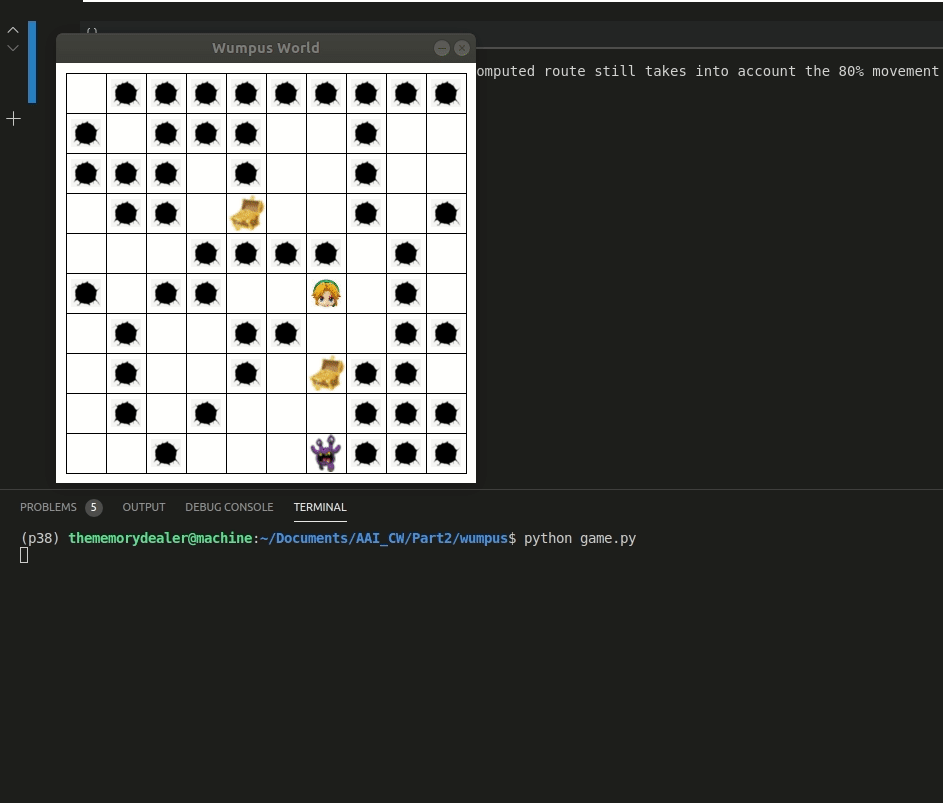

In [3]:
from IPython.display import Image
Image(filename='./assets/expl2.gif') 

The output above illustrates the suicide flag functionality. Link started moving to the closest gold, but once that was collected, he realized there is no way to the other one and started performing random actions. Such functionality was developed while running tests (see solution c)). Given that the tests were run with considerably large numbers of gold and pits, it was inevitable that some pieces of gold would be inaccessible. This would freeze the q-learning process and the tests as well.  The suicide functionality is implemented in a niave way and was discovered through debugging where in such case a value of ~(-3.99999999) would be assigned to the **old_q_value** variable. This exploit was spotted and made use of. It does however affect the functionality in the dynamic environment which I will discuss later. 

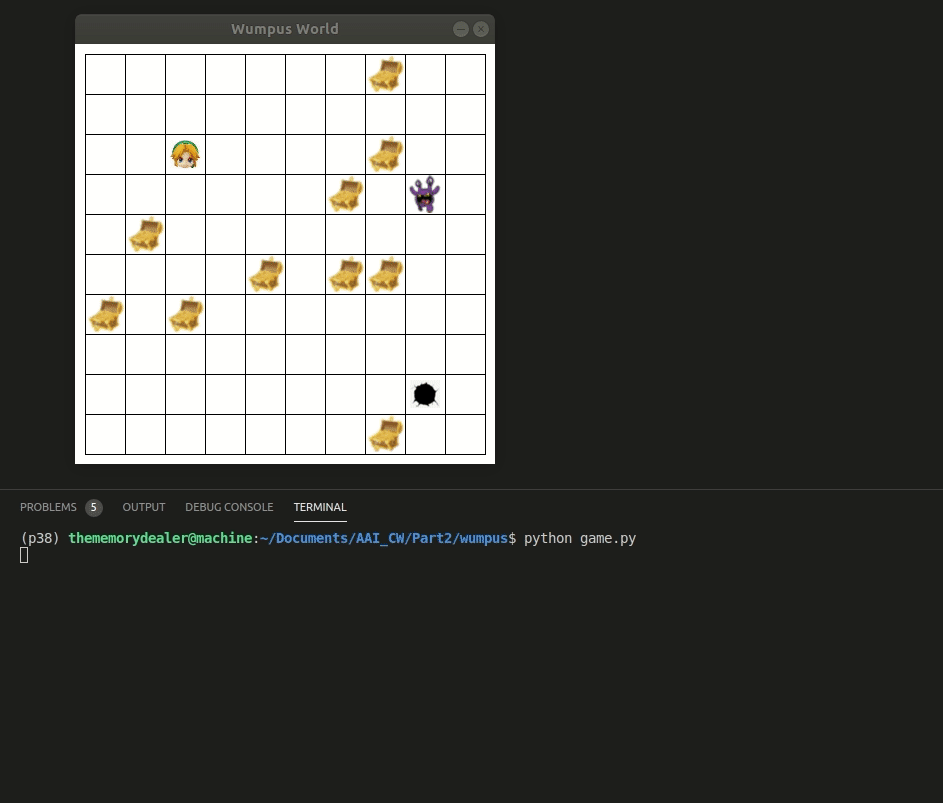

In [4]:
from IPython.display import Image
Image(filename='./assets/expl3.gif') 

The above example shows Link navigating through a level with 10 gold chests and collecting every single one, moving to the closest one each time.

### Dynamic environment 

This is where the unconventional use of q-learning comes in. As Wumpus moves each step $t$ along with Link, the learning process needs to be redone as the reward map is constantly changing. If the reward map is left unaltered from the Static environment, Link has no way of knowing where the Wumpus might be. Observe below.

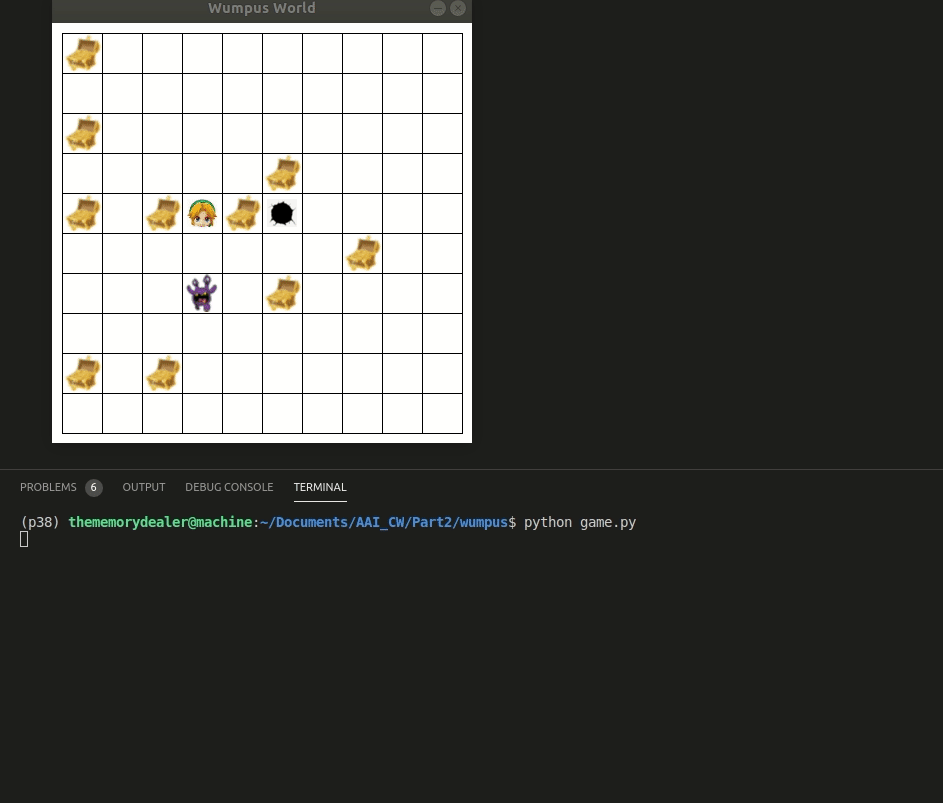

In [6]:
from IPython.display import Image
Image(filename='./assets/expl4.gif') 

Link still does a good job at running away from the Wumpus when he is tailgating him, however the fact that he does not know where Wumpus might be is an issue. To account for this, the reward map needed to be changed slightly, addint penalty to all directions where the Wumpus might move.

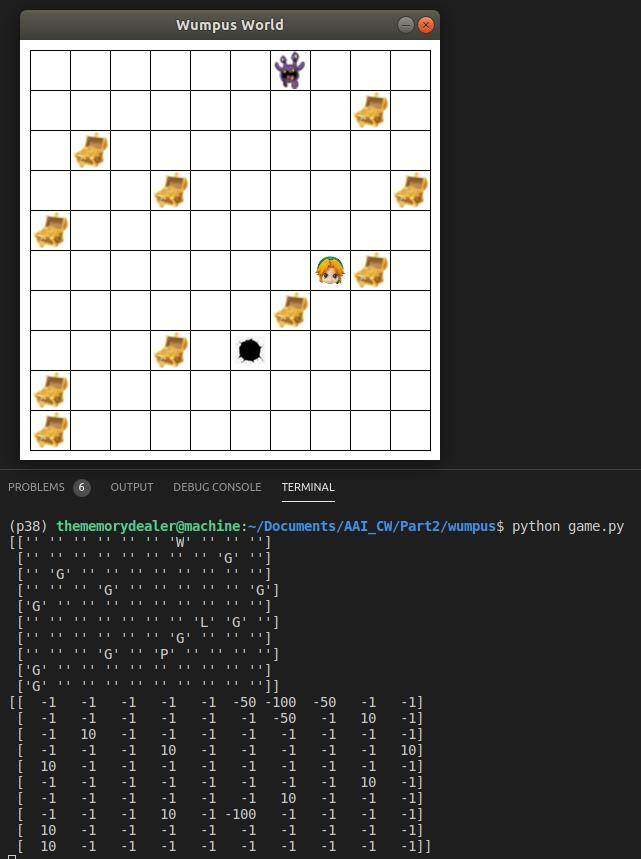

In [8]:
from IPython.display import Image
Image(filename='./assets/pic2.jpg') 

Note the -50 reward in the adjacent rooms where the Wumpus is able to move to. The functionality accounts for rooms that are unavailable (rooms that already have gold or pits and rooms outside of the map). This functionality should be changed sligtly to reduce the reward of gold if Wumpus is next to it, because now Link will just move towards the goal and not see that the Wumpus can enter it as well. Regardless, in such case the WIN procedure is issued before the LOSE one, therefore we can asume if Wumpus and Link enter the room with the final gold together, the Wumpus will injure Link before he teleports back to Hyrule where Zelda can heal his wounds. Link will however die if he enters a room with Wumpus and the gold in that room is not the final piece of Link's loot. 

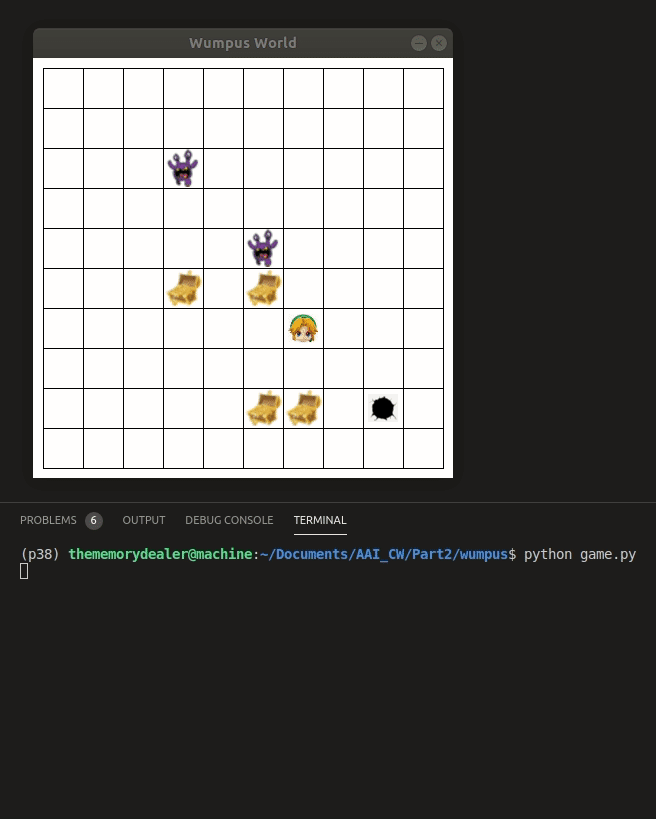

In [11]:
from IPython.display import Image
Image(filename='./assets/expl6.gif') 

The above was an almost perfect run. Link messed up a bit in the end due to non deterministic movement and the suicide functionality got to him in the end. Not too sure why it occured there as there was clearly a visible way out of that situation, but im certain it has something to do with my naive implementation of it (see line 197 in Link.py). 

Now here is a showcase of Link performing quite well in a dynamic environment with one Wumpus 

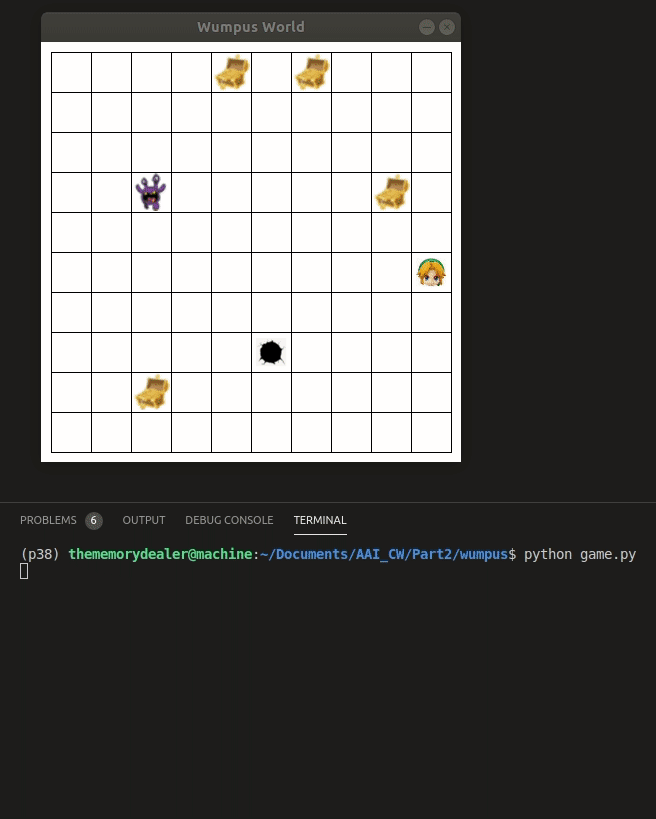

In [12]:
from IPython.display import Image
Image(filename='./assets/expl5.gif') 

### Solution: c)

The procedural script in **batch.py** should be quite clear on how I ran my tests (I left handy comments). The tests were run for a map size of 6x6-19x19, 1-2 Wumpus, 1-4 gold, Static and Dynamic envs and 1-19 pits. The stats of the runs are outputted to **stats.csv** and there is also a log file which will help you understand what happened during the runs (includes run index and minimap at each state). The log which stores the path information is also given.

In [13]:
import pandas as pd # import lib
df = pd.read_csv('stats.csv', delimiter=',') # create data-frame with data
df

RUN   GRID  NWUMPUS  NPITS  NGOLD      ENV OUTCOME  REASON  \
0          1    6x6        1      1      1   Static     WON       -   
1          2    7x7        1      1      1   Static     WON       -   
2          3    8x8        1      1      1   Static     WON       -   
3          4    9x9        1      1      1   Static     WON       -   
4          5  10x10        1      1      1   Static     WON       -   
...      ...    ...      ...    ...    ...      ...     ...     ...   
12763  12764  15x15        2     19      4  Dynamic    LOST  WUMPUS   
12764  12765  16x16        2     19      4  Dynamic    LOST  WUMPUS   
12765  12766  17x17        2     19      4  Dynamic    LOST  WUMPUS   
12766  12767  18x18        2     19      4  Dynamic    LOST  WUMPUS   
12767  12768  19x19        2     19      4  Dynamic    LOST  WUMPUS   

       SUICIDEFLAG  
0            False  
1            False  
2            False  
3            False  
4            False  
...            ...  
12763        False  
12764        False  
12765        False  
12766        False  
12767        False  

[12768 rows x 9 columns]

In [15]:
print(df.groupby('OUTCOME').size().div(len(df)))

OUTCOME
LOST    0.514724
WON     0.485276
dtype: float64


We can see from this that our agent won 51% of the games in both environments

In [31]:
rating_probs = df.groupby('OUTCOME').size().div(len(df)) # initial prob of something happening
df.groupby(['ENV', 'OUTCOME']).size().div(len(df)).div(rating_probs, axis=0)

ENV      OUTCOME
Dynamic  LOST       0.763999
         WON        0.219981
Static   LOST       0.236001
         WON        0.780019
dtype: float64

As expected, the win rate in the Static environment is ~50% higher

In [37]:
df.groupby(['ENV','OUTCOME','REASON']).size().div(len(df)).div(rating_probs, axis=0)

ENV      OUTCOME  REASON
Dynamic  LOST     PIT       0.103621
                  WUMPUS    0.660377
         WON      -         0.219981
Static   LOST     PIT       0.207851
                  WUMPUS    0.028150
         WON      -         0.780019
dtype: float64

From the above output we can see that in a Dynamic environment there's a 66% chance of dying from the encounter with the Wumpus, 10% chance of falling into a pit, and a 22% chance of making it out alive. In a static environment, it is much more likely to fall into a pit than be killed by the Wumpus.